# Key Data Structures

Steve Pittard wsp@emory.edu (citations to other sources are inline) 

This notebook introduces several data structures and workflows that are commonly used in data science with Python. Along the way, we will also encounter some practical issues that arise when working in real computing environments. Python libraries evolve over time, and changes in versions can make code that worked previously behave differently or stop working altogether. 

Tools like Conda help manage these environments, but they also introduce their own learning curve. Rather than treating these moments as mistakes, we will use them as opportunities to understand how Python, libraries like Pandas, and their surrounding ecosystem actually behave in practice. Learning to recognize and reason through these common gotchas is an essential part of becoming a confident and effective data analyst.

## Change is Inevitable

Python and its data science libraries evolve rapidly, especially those used for data manipulation, analysis, and computation at scale. This pace of change reflects growing demands to handle larger datasets, more complex workflows, and more reliable behavior across diverse computing environments. 

As a result, code that works in one setting or at one point in time may behave differently or stop working when run in a newer environment with updated libraries, such as a different Conda setup. This can be frustrating, but it is also a sign of active development and improving standards. 

Just don't be surprised if you take these notebooks to a different conda environment and you get warnings - hopefully not errors. 


## Pandas 

Unlike R which has data frames as a built in data type, the Python language requires us to load a package called pandas which endows Python with dataframe-like capability. Think of data frames as being a generlization of the table format so favored by Excel enthusiasts the world over. Tabular data is easy on the human eye because generally speaking each row relates to a single observation (not always) and each column represents some tpye of measurement of attribute of that observation. 

Using the Excel comparison, a single dataframe can be considered as a single "worksheet" although one could have a structure in Python (like a dictionary or list) which could contain one or more data frames. However, we usually restrict our attention to a single dataframe at any given time. We can create dataframes ourselves though it's more common for us to get them by reading in files such as .csv files or even Excel files since Python allows us to do this. 

<img src="pics/dfex.png">

It's never that easy though...

There are different ways in which data arrives such as by webscraping or by querying a database. It's also possible that we might use an Application Programming Interface (API) to get data in which case the data might be returned in JSON or XML format which would then require us to parse it into something more convenient. 

The summary is that we can't always count on data being in tabular format though frequently it is. We might have to massage the data into a format on its way to becoming a data frame. Let's look at a couple of examples of structures that you will definitely encounter. Yoiur goal will generally be to take these and turn them into aa Pandas data frame although in some cases the data might be too big. 


## Lists

- Lists are extremely common in Python so you need to know about them
- They can contain heterogenous data elements
- They are not arrays or series so computing on them is limited
- They can be plotted
- They can easily be converted to arrays, Series, or into data frames

Let's walk through some basic examples. First up we'll review lists. A list is a container of one or more values in some type of presumed order. That is, we talk about things like the "first element", "second element" and so on until the "last element" is reached. Also, the actual list values themselves could be of different types which means that the list can contain a mixture of information. 

The following examples are not necessarily reflective of immediately practical situations but are contrived to make clear certain points which will be useful to know once you start looking at structures returned by scikit-learn. Knowing how to manage lists and dictionaries winds up being very important to get the information you want when you are accessing the quality of a model. 

In [1]:
simple_list = [0,'2',3,'4','test']

print(simple_list)

print("The length of this list is %d" % len(simple_list))

# Let's access various elements via an index or slices

print(simple_list[0:3])    # Slice from 0,1,2

print(simple_list[:3])     # Same as above 

print(simple_list[4])      # Last element

print(simple_list[-1])     # Last element

print(simple_list[-2])     # Second from the last element

print(simple_list[1:])     # Get the first element and everything thereafter

# We can change an element's value 

simple_list[1] = 2

[0, '2', 3, '4', 'test']
The length of this list is 5
[0, '2', 3]
[0, '2', 3]
test
test
4
['2', 3, '4', 'test']


More sophisticated structures are possible. We could have lists with lists as elements. This can be confusing at first.

In [2]:
new_list = [[0,1],10,20]
print(new_list[0:2])

# What is the type of each list element
for item in new_list:
    print("type is:",type(item))
    
# Or use a list comprehension
[type(item) for item in new_list]

[[0, 1], 10]
type is: <class 'list'>
type is: <class 'int'>
type is: <class 'int'>


[list, int, int]

We can also have something more practical. Imagine a list wherein each element could represent an employee.

In [3]:
jdoe  = ["John Doe","1313 Mockingbird Lane","Project Manager",90000,"01-01-2015"]
mdoe  = ["Mary Doe","1915 Eustice Pkwy","Administrator",100000,"12-12-2010"]

# Note the elements don't have a name so we need to index by position
employees = [jdoe, mdoe]
print("John Doe's salary is %d" % employees[0][3])

# Does the following work ?
# employees[2] = ['Steve','unknown','teacher',1000000]

John Doe's salary is 90000


### Operations on lists

There are a variety of operations which are possible on lists:
    
<img src="pics/slatt.png">


In [4]:
# employees[2] = ['Steve','unknown','teacher',1000000]
employees.append(['Steve','unknown','teacher',1000000])

# Print the list
print(simple_list)

# Reverse it - note that there is no output
simple_list.reverse()

# Now print the list again
print(simple_list)

# Okay - we could reverse the reverse operation
simple_list.reverse()

# Now print the list again
print(simple_list)

# similar to the above
for a in simple_list:
    print("item is",a)

# Print the type of each element
# This is better for saving
[item for item in simple_list]

# Get all the element types into a list
[type(item) for item in simple_list]


[0, 2, 3, '4', 'test']
['test', '4', 3, 2, 0]
[0, 2, 3, '4', 'test']
item is 0
item is 2
item is 3
item is 4
item is test


[int, int, int, str, str]

In [5]:
# Append to the list
simple_list.append(27)
print(simple_list)

# Now delete an element
del(simple_list[0])
print(simple_list)

[0, 2, 3, '4', 'test', 27]
[2, 3, '4', 'test', 27]


Check for list membership. With such a simple list, the utility of this is not apparent though it can save you a lot of work if you have a very large list structure. 

In [6]:
print(27 in simple_list)
print(27 not in simple_list)

True
False


List can be sorted as long as the elements are all of the same type as it doen't make sense to sort a heterogenous list. 

In [7]:
import numpy as np

same_list = [0,20,-5,6]
print(same_list)

# Now sort it
same_list.sort()
print(same_list)

# At what position does the value of "6" appear ?
print("The value %d appears at position %d within the list" % (6,same_list.index(6)))

# If we had a larger list and wanted all occurrences of a value
my_nums = list(np.random.randint(5,10,size=20))
print(my_nums)

import numpy as np
# Numpy also has a solution which works well for really big lists
ii = np.where(np.array(my_nums) == 7)[0]
print(ii)

[0, 20, -5, 6]
[-5, 0, 6, 20]
The value 6 appears at position 2 within the list
[8, 8, 8, 5, 5, 7, 8, 5, 8, 9, 5, 9, 6, 5, 5, 8, 8, 5, 9, 6]
[5]


## Looping Over Lists

There are different ways to process elements of a list 

In [8]:
# Find all occurences of a "7"

for num in range(0,len(my_nums)):
    if my_nums[num] == 7:
        print("A seven was found at element",num)
        
# We do this because this won't work
for num in my_nums:
    if num == 7:
        print("A seven was found at element",num)

A seven was found at element 5
A seven was found at element 7


In [503]:
# We need a generic way to get both the element number and its value
for element_number, element_value in enumerate(my_nums):
    print("element number %d has value %d" % (element_number,element_value))

element number 0 has value 7
element number 1 has value 5
element number 2 has value 8
element number 3 has value 7
element number 4 has value 6
element number 5 has value 6
element number 6 has value 7
element number 7 has value 8
element number 8 has value 6
element number 9 has value 9
element number 10 has value 6
element number 11 has value 6
element number 12 has value 7
element number 13 has value 7
element number 14 has value 9
element number 15 has value 7
element number 16 has value 9
element number 17 has value 7
element number 18 has value 6
element number 19 has value 6


In [9]:
# The enumerate function can give us element number as well as element value
for element_number, element_value in enumerate(my_nums):
    if element_value == 7:
        print("A value of 7 was found at element number",element_number)

A value of 7 was found at element number 5


In [10]:
# We can use a construct called a list comprehenesion to collapse this 

indices = [i for i, x in enumerate(my_nums) if x == 7]
print("A value of 7 occurs at %s" % str(indices))

A value of 7 occurs at [5]


### From Lists To Data Frames

These next examples motivate how and why it might be useful to create a data frame out of lists especially those like the ones above. There is also the situation wherein we have array data that resembles matrix data emerging from scientific experiments. Let's simulate some of that here using the numpy module. 

In [128]:
import pandas as pd

# generate some random data in the form of a 10 row by 3 column array
data = np.random.randint(10,99,size=(3,3))

So let's generate 5 of these arrays and store them in a list. The following scenario is not uncommon in scientific circles where an experiment might dump data every 10 minutes over the course of a multi-day experiment after which you might want to combine it all into a conveninet data structure. It's also possible you might want to first filter through the data to exclude data thought to be corrupt. 

In [129]:
# Generate a 3x3 array from random integers between 5 and 30
myl = [np.random.randint(5,30,size=(3,3)) for _ in range(3)]

# List first row in every data frame
[print(i[0]) for i in myl]

# Verify the shape for every elment
[print(i.shape) for i in myl]

# We could put these in a dataframe
newdf = pd.DataFrame(np.concatenate(myl),columns=['d1','d2','d3'])
newdf.head()

[12 11 12]
[11 13 18]
[13 29 28]
(3, 3)
(3, 3)
(3, 3)


,d1,d2,d3
0,12,11,12
1,10,14,12
2,28,10,29
3,11,13,18
4,25,13,18


### From Dictionaries To Data Frames

Extending the above concept, many times we have data structures in dictonaries which are data structures that can involve heterogeneous data. Arrays and Series can accomodate only one data type at a time. Lists and dictonaries can handle both types. Lists can even contain dictionaries (and vice versa) such as the following which mimics what happens when you get weather updates from an on line service using an API.

In [130]:
weather = [['atlanta',100,20],['macon',70,25],['marietta',200,39]]
#
data = [ {'area': 'atlanta', 'rainfall': 100, 'temperature': 20}, 
         {'area': 'macon',   'rainfall': 70,  'temperature': 25}, 
         {'area': 'marietta','rainfall': 200, 'temperature': 39 }] 

So what if we wanted to summarize the rainfall for all cities ?

In [131]:
rain = []
for i, somedata in enumerate(data):
    rain.append(data[i]['rainfall'])
print(f"Mean rain fall is {np.mean(rain).round(3)}")

Mean rain fall is 123.333


But this is not convenient and wouldn't scale very well so better to make a data frame out of this since data frames have associated methods which eliminate the need to write summary loops. 

In [133]:
# Create a data from directly 
weather_df = pd.DataFrame.from_dict(data)

# Check it out
print(weather_df)

# Get the average of any column
print(f" \n Mean rain fall is {weather_df.rainfall.mean()}")

       area  rainfall  temperature
0   atlanta       100           20
1     macon        70           25
2  marietta       200           39
 
 Mean rain fall is 123.33333333333333


In [134]:
# Better yet
weather_df.describe()

,rainfall,temperature
count,3.000000,3.000000
mean,123.333333,28.000000
std,68.068593,9.848858
min,70.000000,20.000000
25%,85.000000,22.500000
50%,100.000000,25.000000
75%,150.000000,32.000000
max,200.000000,39.000000


More complex dictionaries are possible such as the one below which nests information underneath the **Temperature** key. Actually, these types of structures are common particualrly when extracing information from an API which typically will return JSON formatted information. JSON looks very much like a Python dictionary. 

In [135]:
weather = {
    'Country': 'USA',
    'City': 'Washington, D.C.',
    'Temperature': {
        'Unit': 'F',
        'Value': 54.3
    }
}
    
weather.get("Temperature",0)

{'Unit': 'F', 'Value': 54.3}

### More About Dictionaries

More explanation about dictionaries would be helpful here. Unlike lists, items in dictionaries are unordered. While visually there appears to be a "first" element, the internal structure doesn't reflect any specific order. Notice the following. Attempting to access a dictionary as if it were a list will fail. Notice first that we create the dictionary by using brace characters instead of brackets. A distinct advantage of using dictionaries is that we can name the elements using an intutiive label if we so desire.

```python
weather = {'area': 'atlanta', 'rainfall': 100, 'temperature': 20}
weather[0]
```
<img src="pics/errors.png">


In [136]:
# Dictonaries have "keys" corresponding to which there are items

weather = {'area': 'atlanta', 'rainfall': 100, 'temperature': 20}
print("Keys are ",weather.keys())
print("Itmes are",weather.items())

Keys are  dict_keys(['area', 'rainfall', 'temperature'])
Itmes are dict_items([('area', 'atlanta'), ('rainfall', 100), ('temperature', 20)])


While the dictionary has more intelligible names, there is less transparency when attempting to access the names and values of the dictionary when compared to the list structure. With lists, you just pick the index or slice and get what you want. We can do things like the following although unless we know the name of the information we want, then we have to loop through the structure to see what's in it.

In [137]:
# This is common though discouraged
print(weather['rainfall'])

# Use of the get method is encouraged because if the 
# key doesn't exist then we can return a value (e.g. 0)
# If we use the first method we get an error
print(weather.get('rainfall',0))

# What if the key doesn't exist ?
# This returns a value of zero
print(weather.get('aaa',0))

100
100
0


In [138]:
# We can always use the enumerate approach
for key, value in enumerate(weather):
    print("Item %s has value %s" % (key, str(value)))

print("\n")

# Check this out
for key, value in weather.items():
    print("Item %s has value %s" % (key,str(value)))
    
print("\n")


# And one more pattern of access
for key in weather.keys():
    print("Item %s has value %s" % (key,str(weather.get(key,0))))

Item 0 has value area
Item 1 has value rainfall
Item 2 has value temperature


Item area has value atlanta
Item rainfall has value 100
Item temperature has value 20


Item area has value atlanta
Item rainfall has value 100
Item temperature has value 20


Here is a practical example of what one could do with a dictionary. We want to count the number of times any single character appears within a sentence. This is a very crude form of text modeling wherein we could do frequency analysis of letters. Obviosuly we would expect the vowels to be more frequent. 

In [139]:
import pprint
message = 'It was a bright cold day in April, and the clocks were striking thirteen.'
count = {}

for character in message:
    count.setdefault(character, 0)
    count[character] = count[character] + 1

count

{'I': 1,
 't': 6,
 ' ': 13,
 'w': 2,
 'a': 4,
 's': 3,
 'b': 1,
 'r': 5,
 'i': 6,
 'g': 2,
 'h': 3,
 'c': 3,
 'o': 2,
 'l': 3,
 'd': 3,
 'y': 1,
 'n': 4,
 'A': 1,
 'p': 1,
 ',': 1,
 'e': 5,
 'k': 2,
 '.': 1}

In [140]:
# Let's normalize everything to lower case so we don't have
# ambiguities 

count = {}

for character in message.lower():
    count.setdefault(character, 0)
    count[character] = count[character] + 1

count

{'i': 7,
 't': 6,
 ' ': 13,
 'w': 2,
 'a': 5,
 's': 3,
 'b': 1,
 'r': 5,
 'g': 2,
 'h': 3,
 'c': 3,
 'o': 2,
 'l': 3,
 'd': 3,
 'y': 1,
 'n': 4,
 'p': 1,
 ',': 1,
 'e': 5,
 'k': 2,
 '.': 1}

Is there a way to sort this stucture to make it easy to see what the most frequently used letters were ? Note that if you just type the name of the dictionary it will simply print it out in some random order. Let's see what happens when we try to sort. This first example will look at the items in the dictionary and look at the first element (they key name) and sort by that which since these are letters then they will be in alphabetical order. 

In [141]:
print(count.items())
print("\n")

# Sort the items
sorted(count.items())

dict_items([('i', 7), ('t', 6), (' ', 13), ('w', 2), ('a', 5), ('s', 3), ('b', 1), ('r', 5), ('g', 2), ('h', 3), ('c', 3), ('o', 2), ('l', 3), ('d', 3), ('y', 1), ('n', 4), ('p', 1), (',', 1), ('e', 5), ('k', 2), ('.', 1)])




[(' ', 13),
 (',', 1),
 ('.', 1),
 ('a', 5),
 ('b', 1),
 ('c', 3),
 ('d', 3),
 ('e', 5),
 ('g', 2),
 ('h', 3),
 ('i', 7),
 ('k', 2),
 ('l', 3),
 ('n', 4),
 ('o', 2),
 ('p', 1),
 ('r', 5),
 ('s', 3),
 ('t', 6),
 ('w', 2),
 ('y', 1)]

In [142]:
sorted_freq = sorted(count.items(), key = lambda kv: kv[1], reverse=True)
sorted_freq

[(' ', 13),
 ('i', 7),
 ('t', 6),
 ('a', 5),
 ('r', 5),
 ('e', 5),
 ('n', 4),
 ('s', 3),
 ('h', 3),
 ('c', 3),
 ('l', 3),
 ('d', 3),
 ('w', 2),
 ('g', 2),
 ('o', 2),
 ('k', 2),
 ('b', 1),
 ('y', 1),
 ('p', 1),
 (',', 1),
 ('.', 1)]

All of this is kind of a pain so a better approach is to turn the dictionary into a data frame which generally speaking makes things easier to manage. Let's do this.

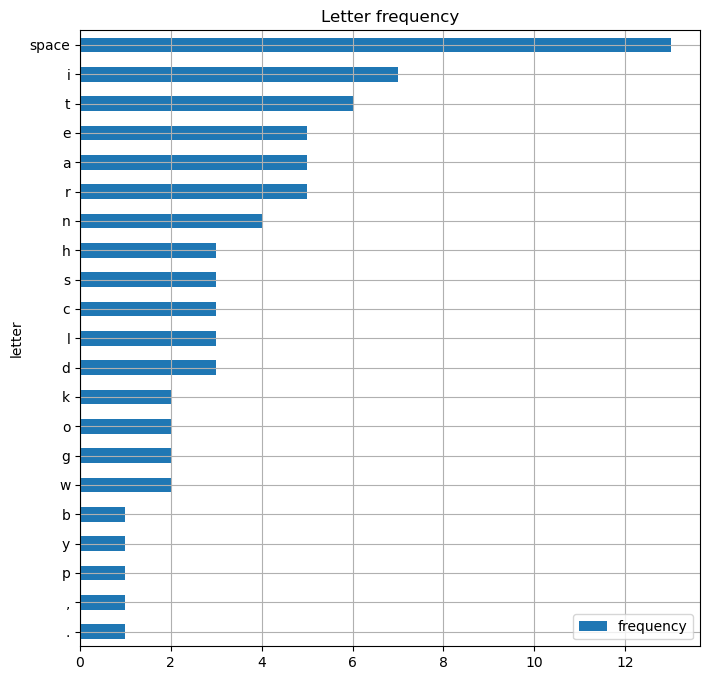

In [143]:
import matplotlib.pyplot as plt

# Let's use a data frame to help us out
newdf = pd.DataFrame.from_dict(count.items())
newdf.columns = ['letter','frequency']

# Now let's sort the data frame
newdf.sort_values('frequency',inplace=True)

# Replace the " " with the word "space"
newdf.replace(" ","space",inplace=True)

# Make the plot happen
newdf.set_index("letter").plot(kind="barh",title="Letter frequency", figsize=(8,8)) 
plt.grid()

Let's work through the following example which uses an API to fetch some information. Check out this [web page](https://www.engineeringbigdata.com/api-and-json-example-in-python/) which contains the primary content for most of this example. This uses the [Datamuse API Word-Finding Query](http://www.datamuse.com/api/)


> The Datamuse API is a free API that requires no sign-up or tokens for use. This API is great for developers as a word-finding query engine and is for use in your apps to find words that will match a set of constraints. Also, developers can specify a wide variety of constraints such as meaning, spelling, sound, vocabulary in the word-finding query.

In this example we will find words with a meaning similar to "data engineering". This is a very basic example API and JSON code to print out the data that this tutorial is searching for. As one can see, there is no need for API keys or tokens in this example.

In [149]:
import requests

query = "data engineering"
url = "https://api.datamuse.com/words"

params = {
    "ml": query,
    "max": 10
}

response = requests.get(url, params=params)
words = response.json()

words

[{'word': 'bionics',
  'score': 11843,
  'tags': ['results_type:backfill_gloss',
   'n',
   'results_type:primary_external']},
 {'word': 'computing', 'score': 11843, 'tags': ['n']},
 {'word': 'detail', 'score': 11843, 'tags': ['n', 'v']},
 {'word': 'graphics', 'score': 11843, 'tags': ['n']},
 {'word': 'microarchitecture', 'score': 11843, 'tags': ['n']},
 {'word': 'project', 'score': 11843, 'tags': ['n', 'v']},
 {'word': 'specs', 'score': 11843, 'tags': ['n']},
 {'word': 'technology', 'score': 11843, 'tags': ['n']},
 {'word': 'dna', 'score': 11785, 'tags': ['n', 'v']},
 {'word': 'books', 'score': 11612, 'tags': ['n']}]

df_words = pd.DataFrame(words)
df_words
We won't be working through the rest of the example on the website although it is pretty interesting. It basically looks for words that are similar to "Python". As for our interests, the larger point here is that we now have what appears to be a dictionary although it is also JSON. We can parse this information into a dataframe and work with much easier there as long as we understand the process isn't perfect. Note that the tags column can have a list with multiple values. We might want to make other columns to hold tags or somehow make the number of tags symmetrial. 

In [151]:
df_words = pd.DataFrame(words)
df_words


,word,score,tags
0,bionics,11843,"[results_type:backfill_gloss, n, results_type:..."
1,computing,11843,[n]
2,detail,11843,"[n, v]"
3,graphics,11843,[n]
4,microarchitecture,11843,[n]
5,project,11843,"[n, v]"
6,specs,11843,[n]
7,technology,11843,[n]
8,dna,11785,"[n, v]"
9,books,11612,[n]


### Dictionaries And scikit-learn

Dictionaries are very important to understand as they are frequently used in scikit-learn work. 

- Dictionaries can though of as "named" lists
- You refer to dictionary elements as "keys"
- The values associated with a "key" is called its "value"
- Many programming APIs (Application Programming Interface) return JSON which is basically a dictionary
- Most importantly is that scikit-learn frequently returns dictionaries with helpful information

In [210]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV

# Load some data
iris = datasets.load_iris()

# Set some parameters for the SVM method
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}

# Make an instance of s SVM
svc = svm.SVC()

# Now do the GridSearch
clf = GridSearchCV(svc, parameters)
clf.fit(iris.data, iris.target)

# guess what we get back ?
sorted(clf.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_C',
 'param_kernel',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [211]:
clf.cv_results_

{'mean_fit_time': array([0.00894175, 0.00062461, 0.00040288, 0.000453  ]),
 'std_fit_time': array([0.01695375, 0.00021553, 0.00011084, 0.00012444]),
 'mean_score_time': array([0.00207787, 0.00031314, 0.00021896, 0.00170274]),
 'std_score_time': array([3.65269198e-03, 4.01367180e-05, 3.38050306e-06, 2.74291169e-03]),
 'param_C': masked_array(data=[1, 1, 10, 10],
              mask=[False, False, False, False],
        fill_value=999999),
 'param_kernel': masked_array(data=['linear', 'rbf', 'linear', 'rbf'],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1, 'kernel': 'linear'},
  {'C': 1, 'kernel': 'rbf'},
  {'C': 10, 'kernel': 'linear'},
  {'C': 10, 'kernel': 'rbf'}],
 'split0_test_score': array([0.96666667, 0.96666667, 1.        , 0.96666667]),
 'split1_test_score': array([1.        , 0.96666667, 1.        , 1.        ]),
 'split2_test_score': array([0.96666667, 0.96666667, 0.9       , 0.96666667]),
 'split3_test_s

In [353]:
results = clf.cv_results_
for key, value in results.items():
    print(type(value))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ma.core.MaskedArray'>
<class 'numpy.ma.core.MaskedArray'>
<class 'list'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [354]:
results.get('params')

[{'C': 1, 'kernel': 'linear'},
 {'C': 1, 'kernel': 'rbf'},
 {'C': 10, 'kernel': 'linear'},
 {'C': 10, 'kernel': 'rbf'}]

## Series 

Series can thought of as one dimensional arrays or one dimensional data frames. The R equivalent of Series is a vector structure. One of the more common uses for Series is as a random number generator for various simulations. The advantage of using a Series of things is that there are lots of methods that can be used on them. Still, many times they wind up becoming part of a matrix or dataframe so in general we don't do a lot of work using just one Series object. 

In [556]:
import pandas as pd
my_series = pd.Series(range(50))

print("Mean is:",my_series.mean())
print("Cumulative sum is:",my_series.cumsum()[49])
print("Series Description:",my_series.describe())

Mean is: 24.5
Cumulative sum is: 1225
Series Description: count    50.00000
mean     24.50000
std      14.57738
min       0.00000
25%      12.25000
50%      24.50000
75%      36.75000
max      49.00000
dtype: float64


0    43
1    22
2    30
3    47
4    27
5    46
6    20
7    14
8    31
9    10
dtype: int64


<AxesSubplot:title={'center':'Line Plot'}>

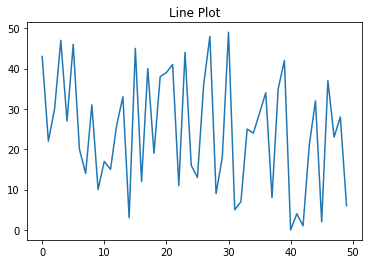

In [558]:
import random
random.shuffle(my_series)  # Shuffle in list values around

# the numbers are now shuffled
print(my_series[0:10])

# Series have built in plot methods
my_series.plot.line(title="Line Plot")

Random set of uniform numbers: [0.72943119 0.38193367 0.91419049 0.33107223]
Random uniform array:
 [[0.27295786 0.31154986 0.68707217 0.51044436]
 [0.94685239 0.73570067 0.25815193 0.25640302]
 [0.57028278 0.99862326 0.98610582 0.08641675]
 [0.92081844 0.97737701 0.99995115 0.12181479]]
Random integer array:
 [6 9 5 9 5]


<AxesSubplot:ylabel='Frequency'>

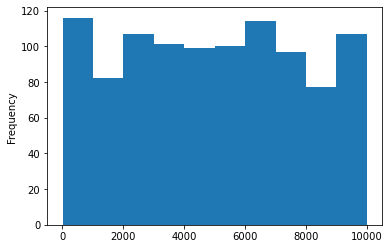

In [559]:
# Get an array of the given shape and populate it with random samples 
# from a uniform distribution over [0, 1).

print("Random set of uniform numbers:",np.random.rand(4))
print("Random uniform array:\n",np.random.rand(4,4))

# Return random integers from the “discrete uniform” distribution 
print("Random integer array:\n",np.random.randint(5,10,size=5))

# Turn the array into a Series which has built in plot methods
pd.Series(np.random.randint(1,10000,size=1000)).plot.hist()

Here is a powerful way to generate data from common statisitcal distributions.

array([[2.36290547, 1.56944132, 2.82976443, 0.794314  ],
       [4.60754759, 3.55318164, 2.09775459, 3.70652625]])

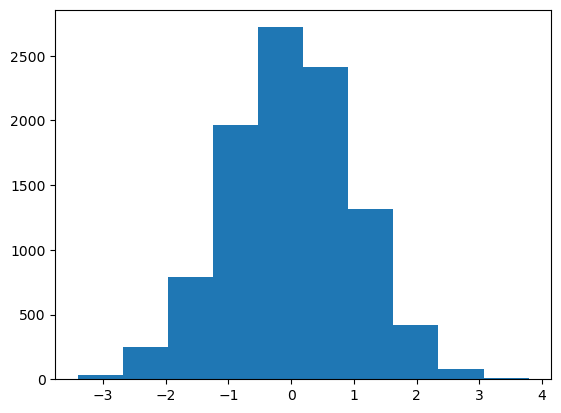

In [36]:
# 10,000 values from a N(0,1) distribution
plt.hist(np.random.normal(0,1,10000))

np.random.normal(3, 2.5, size=(2, 4))

Text(0.5, 1.0, 'Uniform Distribution')

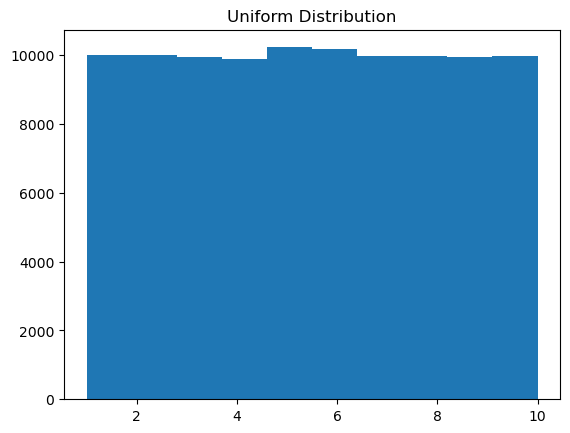

In [37]:
uni = np.random.uniform(1,10,100000)
plt.hist(uni)
plt.title("Uniform Distribution")

## Data Frame Walkthrough

As an Emory affiliate, you have free access to the catalogue of O'Reilly and Safari technical publications which are likely to be helpful to you in this course and in general programming and machine learning work. Go to the [login link](https://business.library.emory.edu/research-learning/databases/safari.php) which will then take you to the O'Reilly login page. 

<img src="pics/oreilly.png">

It might ask you to identify your institution although I think you have to click the "don't see my institution listed" category after which is will ask you for your Emory id information. This processs should allow you total access to the entire catalogue. In this notebook I'm using material based in part on the following publication:

> The Data Wrangling Workshop - Second Edition
  By Brian Lipp, Shubhadeep Roychowdhury and Dr. Tirthajyoti Sarkar

You can refer directly to that publication if you so wish though I also include lots of examples that aren't part of that text.  

In [40]:
# xlrd is an Excel file reader library - You probably have to install this 
# pip install xlrd

import xlrd

# Read in a sales worksheet
url = "https://raw.githubusercontent.com/steviep42/bios_534_2021/main/data/superstore.xls"
df = pd.read_excel(url)

# What have we here ?
df.head(4)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310


This looks like product sales information which includes a number of details. The first row, "Row ID" is redundant so we can probably get rid of it.

In [41]:
print("There are %d columns" % df.columns.shape[0])
[i for i in df.columns]

There are 21 columns


['Row ID',
 'Order ID',
 'Order Date',
 'Ship Date',
 'Ship Mode',
 'Customer ID',
 'Customer Name',
 'Segment',
 'Country',
 'City',
 'State',
 'Postal Code',
 'Region',
 'Product ID',
 'Category',
 'Sub-Category',
 'Product Name',
 'Sales',
 'Quantity',
 'Discount',
 'Profit']

In [42]:
df.drop('Row ID',axis=1,inplace=True)

In [43]:
print("There are %d columns" % df.columns.shape[0])

# Notice that Row ID has been removed
[i for i in df.columns]

There are 20 columns


['Order ID',
 'Order Date',
 'Ship Date',
 'Ship Mode',
 'Customer ID',
 'Customer Name',
 'Segment',
 'Country',
 'City',
 'State',
 'Postal Code',
 'Region',
 'Product ID',
 'Category',
 'Sub-Category',
 'Product Name',
 'Sales',
 'Quantity',
 'Discount',
 'Profit']

### Subsetting

Subsetting data is a big thing with dataframes. There are at least two scenarios at work here: 

   - Wanting to see some number of rows from the dataframe and/or 
   - some subset of data which satisfies some criteria. 
   
In combination with either of these, you might want to limit the columns of interest. Pandas has two functions called [**loc**](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html) and [**iloc**](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html) which are commonly used to access information residing in data frames. There are some shortcuts that don't require the use of either although in my opinion it's best to use one or the other until you become more proficient with pandas dataframe subsetting.

In [44]:
# Let's get some number of rows - simple enough
df[0:5]

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [45]:
# Let's get some columns - easy enough
df[['Country','State']]

,Country,State
0,United States,Kentucky
1,United States,Kentucky
2,United States,California
3,United States,Florida
4,United States,Florida
...,...,...
9989,United States,Florida
9990,United States,California
9991,United States,California
9992,United States,California


In [403]:
# Uh oh - you would think that the following SHOULD work - but doesn't
# df[0:5,['Country','State']]

TypeError: '(slice(0, 5, None), ['Country', 'State'])' is an invalid key

You need to use "indexers" that match your intent. We can index via numbers or column names. If we do one or the other then it's pretty straightforward but if we try to mix them then we need to use either **loc** or **iloc**. 

In [46]:
# iloc is used for numeric access
df.iloc[0:5,0:2]

,Order ID,Order Date
0,CA-2016-152156,2016-11-08
1,CA-2016-152156,2016-11-08
2,CA-2016-138688,2016-06-12
3,US-2015-108966,2015-10-11
4,US-2015-108966,2015-10-11


In [47]:
# loc is used for column access 
df.loc[0:5,['Order ID',"Order Date"]]

,Order ID,Order Date
0,CA-2016-152156,2016-11-08
1,CA-2016-152156,2016-11-08
2,CA-2016-138688,2016-06-12
3,US-2015-108966,2015-10-11
4,US-2015-108966,2015-10-11
5,CA-2014-115812,2014-06-09


In [48]:
df.index

RangeIndex(start=0, stop=9994, step=1)

We can access indivual columns a couple of ways

In [49]:
df.Sales

0       261.9600
1       731.9400
2        14.6200
3       957.5775
4        22.3680
          ...   
9989     25.2480
9990     91.9600
9991    258.5760
9992     29.6000
9993    243.1600
Name: Sales, Length: 9994, dtype: float64

In [52]:
df.Sales.mean()

229.85800083049833

In [53]:
df.loc[:,['Sales','Profit']]

,Sales,Profit
0,261.9600,41.9136
1,731.9400,219.5820
2,14.6200,6.8714
3,957.5775,-383.0310
4,22.3680,2.5164
...,...,...
9989,25.2480,4.1028
9990,91.9600,15.6332
9991,258.5760,19.3932
9992,29.6000,13.3200


<Axes: >

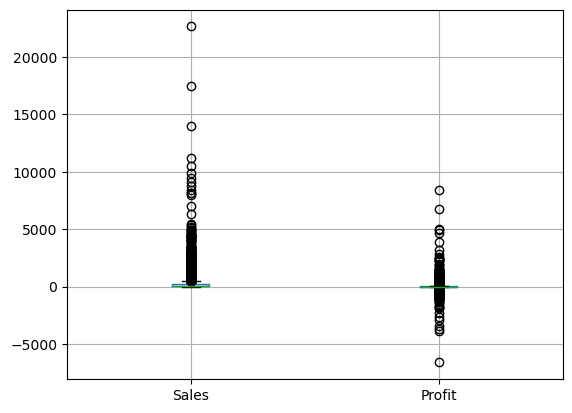

In [54]:
df.loc[:,['Sales','Profit']].boxplot()


<Axes: >

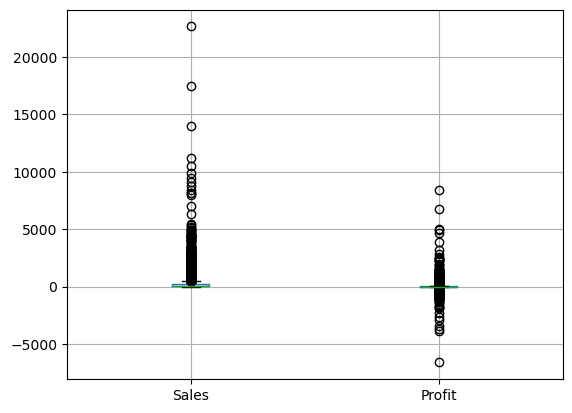

In [55]:
df[['Sales','Profit']].boxplot()

<AxesSubplot:>

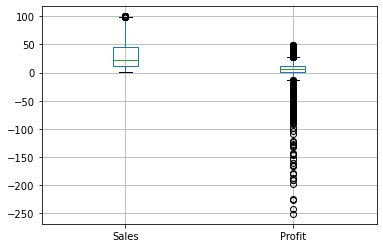

In [591]:
df.loc[df.Sales < 100,['Sales','Profit']].boxplot()

The way this works is that providing a boolean phrase results in a True / False value which in turn dictates what values get displayed.

In [56]:
df.Sales > 3000

0       False
1       False
2       False
3       False
4       False
        ...  
9989    False
9990    False
9991    False
9992    False
9993    False
Name: Sales, Length: 9994, dtype: bool

In [57]:
df.loc[df.Sales > 3000,['Sales','Profit']]

,Sales,Profit
27,3083.430,-1665.0522
165,8159.952,-1359.9920
251,3347.370,636.0003
262,3059.982,-509.9970
318,3991.980,1995.9900
...,...,...
9639,4297.644,-1862.3124
9649,3406.664,160.3136
9660,3023.928,226.7946
9741,4404.900,1013.1270


One thing I always want to know is what columns are factors / categories and which are continuous in nature. This provides some insight into how I might summarize the data. For example, wanting to know how much profit there was by State might be useful to know. But first, let's see what the number of unique values there are for each column

In [58]:
df.nunique()

Order ID         5009
Order Date       1237
Ship Date        1334
Ship Mode           4
Customer ID       793
Customer Name     793
Segment             3
Country             1
City              531
State              49
Postal Code       631
Region              4
Product ID       1862
Category            3
Sub-Category       17
Product Name     1850
Sales            6144
Quantity           14
Discount           12
Profit           7545
dtype: int64

This is very useful in that we can see that things like Segment, Ship Mode, Region, and Category are clearly categories since they take on only a few unique values. It's possible that columns like State are also categories even though there are 49 unique values. I would imagine that not every state has equal sales and profit. It looks like the creators of this information have already included a region column to make it easy for us to summarize sales by region. Now that we understand these differences, we can start to ask some questions.

In [59]:
# What is the distribution of shipment methods
df['Ship Mode'].value_counts()

Ship Mode
Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: count, dtype: int64

In [60]:
# Let's see how many sales there were that exceed the mean Sales 
# Pull out only the Sales and Shipping Mode columns

df.loc[df["Sales"] > df["Sales"].mean(),['Sales','Ship Mode']]

# same as 

df.loc[df.Sales > df.Sales.mean(),['Sales','Ship Mode']]

,Sales,Ship Mode
0,261.9600,Second Class
1,731.9400,Second Class
3,957.5775,Standard Class
7,907.1520,Standard Class
10,1706.1840,Standard Class
...,...,...
9973,271.9600,Standard Class
9976,249.5840,Standard Class
9979,437.4720,Standard Class
9991,258.5760,Standard Class


In [61]:
# This will show only how many records there are
df.loc[df["Sales"] > df["Sales"].mean(),['Sales','Ship Mode']].shape[0]

2360

In [62]:
# How many orders were there from Georgia that exceeded the average sales ?
df.loc[(df["State"] == "Georgia") & (df["Sales"] > df["Sales"].mean())].shape[0]

51

In [63]:
# Note that if the column name has no spaces then we can do the following
# which uses the "dot" notation
df.loc[(df.State == "Georgia") & (df.Sales > df.Sales.mean())].shape[0]

51

In [64]:
# The same as above but get only those sales that were shipped first class

# Might be more legible to create a Boolean expression first 
indices = (df.State == "Georgia") & (df.Sales > df.Sales.mean()) & (df["Ship Mode"] == "First Class")

# Now we use this to subset the data frame
df.loc[indices,["City","State","Ship Mode","Sales"]]

,City,State,Ship Mode,Sales
359,Columbus,Georgia,First Class,647.84
3048,Columbus,Georgia,First Class,411.80
3049,Columbus,Georgia,First Class,360.00
4423,Sandy Springs,Georgia,First Class,302.94
6150,Columbus,Georgia,First Class,354.90
7193,Atlanta,Georgia,First Class,1350.12
9882,Woodstock,Georgia,First Class,272.61


In [65]:
# What were the 5 highest sales ? 
df.nlargest(5,"Sales")

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2697,CA-2014-145317,2014-03-18,2014-03-23,Standard Class,SM-20320,Sean Miller,Home Office,United States,Jacksonville,Florida,32216,South,TEC-MA-10002412,Technology,Machines,Cisco TelePresence System EX90 Videoconferenci...,22638.480,6,0.5,-1811.0784
6826,CA-2016-118689,2016-10-02,2016-10-09,Standard Class,TC-20980,Tamara Chand,Corporate,United States,Lafayette,Indiana,47905,Central,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,17499.950,5,0.0,8399.9760
8153,CA-2017-140151,2017-03-23,2017-03-25,First Class,RB-19360,Raymond Buch,Consumer,United States,Seattle,Washington,98115,West,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,13999.960,4,0.0,6719.9808
2623,CA-2017-127180,2017-10-22,2017-10-24,First Class,TA-21385,Tom Ashbrook,Home Office,United States,New York City,New York,10024,East,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,11199.968,4,0.2,3919.9888
4190,CA-2017-166709,2017-11-17,2017-11-22,Standard Class,HL-15040,Hunter Lopez,Consumer,United States,Newark,Delaware,19711,East,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,10499.970,3,0.0,5039.9856


In [66]:
# In what cities did they occur ?
df.nlargest(5,"Sales")[["City","Sales"]]

,City,Sales
2697,Jacksonville,22638.480
6826,Lafayette,17499.950
8153,Seattle,13999.960
2623,New York City,11199.968
4190,Newark,10499.970


### Grouping

So remember when I talked about identifying which columns represented groups or categories ? This is where that exercise comes in handy. We can "Split" or "group" the data frame by a grouping factor which is the name of one of the columns. This is useful to split data into groups and implement some function over thowe gorups. We can also (re)combine this information into another structure. We can also apply some statistical summary functions to each group. Let's do some grouping of the Sales data and apply some summary functions to help us understand the data

In [70]:
df_subset = df.loc[:,["Ship Mode","State","Sales"]]
df_subset.head()

,Ship Mode,State,Sales
0,Second Class,Kentucky,261.9600
1,Second Class,Kentucky,731.9400
2,Second Class,California,14.6200
3,Standard Class,Florida,957.5775
4,Standard Class,Florida,22.3680


In [71]:
# Do the grouping - Not much seems to be happening 
bystate = df_subset.groupby("State")
bystate

In [73]:
bystate.mean(numeric_only=True)

,Sales
State,
Alabama,319.846557
Arizona,157.508933
Arkansas,194.635500
California,228.729451
Colorado,176.418231
Connecticut,163.223866
Delaware,285.948635
District of Columbia,286.502000
Florida,233.612815


In [74]:
# Let's get the highest sales
bystate.mean(numeric_only=True).nlargest(5,"Sales")

,Sales
State,
Wyoming,1603.136000
Vermont,811.760909
Nevada,428.951333
Rhode Island,404.070643
Montana,372.623467


In [75]:
# Could also just sort the dataframe
bystate.mean(numeric_only=True).sort_values(by='Sales', ascending=False).iloc[0:5]

,Sales
State,
Wyoming,1603.136000
Vermont,811.760909
Nevada,428.951333
Rhode Island,404.070643
Montana,372.623467


In [76]:
# Get summary sales statistics for California and Georgia
bystate.describe().loc[['California','Georgia']]

Sales                                                        \
             count        mean         std   min    25%     50%      75%   
State                                                                      
California  2001.0  228.729451  491.005264  0.99  19.76  61.020  225.296   
Georgia      184.0  266.825217  637.796228  1.78  19.23  70.955  250.440   

                     
                max  
State                
California  8187.65  
Georgia     6354.95

In [78]:
# Now get the sales statisitcs for every City in each State
byStateCity = df.groupby(['State','City'])

# This is probably too much info
byStateCity.describe()['Sales']

count         mean       min        25%       50%  \
State     City                                                            
Alabama   Auburn        6.0   294.471667     3.760     8.8050   182.030   
          Decatur      13.0   259.601538    14.940    23.9200    44.950   
          Florence      5.0   399.470000     4.980     7.2700    12.480   
          Hoover        4.0   131.462500     7.160    13.3925    20.725   
          Huntsville   10.0   248.437000     3.620    26.8700    81.920   
...                     ...          ...       ...        ...       ...   
Wisconsin Superior      9.0   144.414444     5.560    17.1200    47.400   
          Waukesha      1.0    54.500000    54.500    54.5000    54.500   
          Wausau        4.0    79.370000    12.390    20.0325    29.605   
          West Allis    2.0   125.240000     8.520    66.8800   125.240   
Wyoming   Cheyenne      1.0  1603.136000  1603.136  1603.1360  1603.136   

                            75%       max         std  
State     City                                         
Alabama   Auburn       456.4075   900.080  361.914543  
          Decatur      239.9200  1215.920  385.660903  
          Florence     152.7600  1819.860  796.488863  
          Hoover       138.7950   477.240  230.646923  
          Huntsville   171.8075  1319.960  419.576667  
...                         ...       ...         ...  
Wisconsin Superior     125.9900   629.100  213.394065  
          Waukesha      54.5000    54.500         NaN  
          Wausau        88.9425   245.880  111.450605  
          West Allis   183.6000   241.960  165.067007  
Wyoming   Cheyenne    1603.1360  1603.136         NaN  

[604 rows x 8 columns]

In [79]:
# Let's zone in on Georgia 
byStateCity.describe()['Sales'].loc["Georgia"]

,count,mean,min,25%,50%,75%,max,std
City,,,,,,,,
Athens,8.0,215.101250,12.78,15.5625,117.445,191.4300,1049.93,346.513785
Atlanta,39.0,440.970256,2.74,14.9050,67.800,223.7750,6354.95,1134.579541
Columbus,68.0,218.309559,3.76,31.8650,69.170,294.9775,2939.93,404.271301
East Point,3.0,89.466667,27.42,51.2100,75.000,120.4900,165.98,70.403705
Macon,6.0,60.668333,7.16,34.4475,48.800,77.5900,142.40,47.597718
Marietta,7.0,419.802857,5.64,80.0100,182.670,663.4950,1263.30,535.060752
Roswell,18.0,369.573333,1.78,15.9450,104.130,337.6800,2690.97,666.660391
Sandy Springs,14.0,142.645000,5.95,15.3075,25.995,81.4200,1266.86,332.815411
Smyrna,17.0,140.606471,5.67,17.9400,119.560,167.9600,484.83,140.443873


In [80]:
# Let's zone in on Georgia and get just the number of sales and average sales amount
# Let's sort the result on the mean to see what cities ordered the most stuff

byStateCity.describe()['Sales'].loc["Georgia"][["count","mean"]].sort_values(by="mean",ascending=False)

,count,mean
City,,
Atlanta,39.0,440.970256
Marietta,7.0,419.802857
Roswell,18.0,369.573333
Columbus,68.0,218.309559
Warner Robins,2.0,217.400000
Athens,8.0,215.101250
Woodstock,2.0,143.325000
Sandy Springs,14.0,142.645000
Smyrna,17.0,140.606471


In [81]:
# If the above is too much at once then feel free to break it down 

bysales = byStateCity.describe()['Sales']
gasales = bysales.loc["Georgia"]
summary = gasales[["count","mean"]].sort_values(by="mean",ascending=False)

summary

,count,mean
City,,
Atlanta,39.0,440.970256
Marietta,7.0,419.802857
Roswell,18.0,369.573333
Columbus,68.0,218.309559
Warner Robins,2.0,217.400000
Athens,8.0,215.101250
Woodstock,2.0,143.325000
Sandy Springs,14.0,142.645000
Smyrna,17.0,140.606471


### Outliers

We'll cover this in more detail when we discuss Data PreProcessing. There are a number of ways to do identify outliers but we'll cover a few here. First, let's intentionally introduce some outlier information. 

In [83]:
# Sample 50 rows from the larger data set
df_sample = (
    df[['Customer Name', 'State', 'Sales', 'Profit']]
    .sample(n=50)
    .copy()
)

df_sample.loc[df_sample.index[5], 'Sales'] = -1000
df_sample.loc[df_sample.index[15], 'Sales'] = -500.0


Let's plot the data in the form of a boxplot. Outliers are typically outside the IQR, the inter quartile range, and in this case we can see the -1000 value in the Sales column. Having negative values in Profit, however, can be legitimate since not all sales result in a profit. 

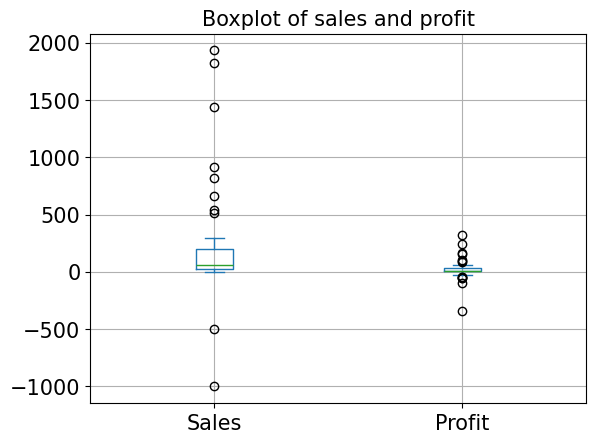

In [84]:
df_sample.plot.box()
plt.title("Boxplot of sales and profit", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(True)

<Axes: ylabel='Frequency'>

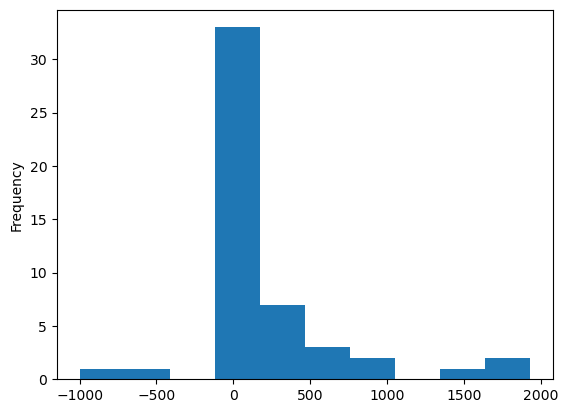

In [85]:

df_sample["Sales"].plot.hist(bins=10)

The following example is taken from [this web site](https://machinelearningmastery.com/model-based-outlier-detection-and-removal-in-python/). This illustrates a couple of approaches to outlier detection.

In [86]:
from sklearn.ensemble import IsolationForest

# The contamination arguments let's us specify and expected amount
# of outliers within the dataset
iso = IsolationForest(contamination=0.1)

# Next we do some predictions to see which rows might be outliers
yhat = iso.fit_predict(df_sample[["Sales","Profit"]])

# select all rows that are outliers
mask = yhat == -1
df_sample.loc[mask]

,Customer Name,State,Sales,Profit
4375,Beth Thompson,California,-1000.000,63.6825
5629,Rick Bensley,Pennsylvania,815.292,-339.7050
1433,Irene Maddox,Alabama,1819.860,163.7874
1701,Natalie DeCherney,New York,1931.040,321.8400
1811,Frank Olsen,Virginia,1441.300,245.0210


In [87]:
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor(n_neighbors=3)

# Next we do some predictions to see which rows might be outliers
yhat = clf.fit_predict(df_sample[["Sales","Profit"]])

# select all rows that are outliers
mask = yhat == -1
df_sample.loc[mask]

,Customer Name,State,Sales,Profit
1846,Dianna Arnett,District of Columbia,37.680,15.8256
4375,Beth Thompson,California,-1000.000,63.6825
2250,Justin MacKendrick,California,541.440,157.0176
1618,Parhena Norris,New York,-500.000,8.9220
1133,Joni Sundaresam,Pennsylvania,124.608,-23.3640
5572,Erin Ashbrook,Ohio,29.940,-23.9520
9937,Christine Phan,California,71.088,-1.7772
870,Paul Knutson,Pennsylvania,280.782,-46.7970
7400,Toby Ritter,Washington,43.130,14.6642
3496,Cathy Armstrong,California,513.024,12.8256


###  User Defined Functions

Writing functions on Python is a common activitiy and is encouraged whenever you find yourself doing something more than a couple of times. It's an example of the "DRY" philosophy which is "Don't Repeat Yourself". It's easy to embed some statements inside a function definition block which then allows you to refer them using the function name. This concept exists in all programming languages and is not unique to Python. 

In [88]:
def adder(x,y):
    sum = x + y
    return(sum)

print(adder(5,10))
print(adder(4,20))

15
24


In [89]:
print(np.arange(0,10))

# We can add two arrays together
adder(np.arange(0,10),np.arange(0,10))

[0 1 2 3 4 5 6 7 8 9]


array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

### Apply User Defined Functions

We can apply user defined functions to specific columns in a data frame. This gives us the ability to create new columns on the fly which might later be useful such as when plotting data.

['High', 'High', 'Low', 'High', 'Low', 'Low', 'Low', 'High', 'Low', 'Medium']

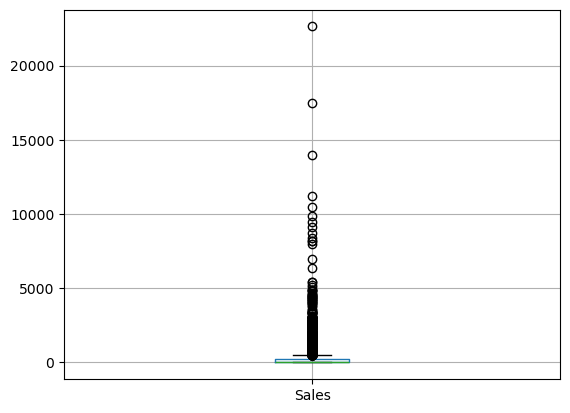

In [90]:
df.boxplot("Sales")

# Define a function
def categorize_sales(price):
    if price < 50:
        return "Low"
    elif (price >= 50 and price < 200):
        return "Medium"
    else:
        return "High"

sales_categories = [categorize_sales(i) for i in df.Sales]
sales_categories[0:10]

In [91]:
# Apply it to the Sales column
df["Sales"].apply(categorize_sales)


0         High
1         High
2          Low
3         High
4          Low
         ...  
9989       Low
9990    Medium
9991      High
9992       Low
9993      High
Name: Sales, Length: 9994, dtype: object

In [92]:

# Now attach it to a data frame
df["Category"] = df["Sales"].apply(categorize_sales)

# Verify that the new column exists
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,High,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,High,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Low,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,High,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Low,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


<Axes: xlabel='Category'>

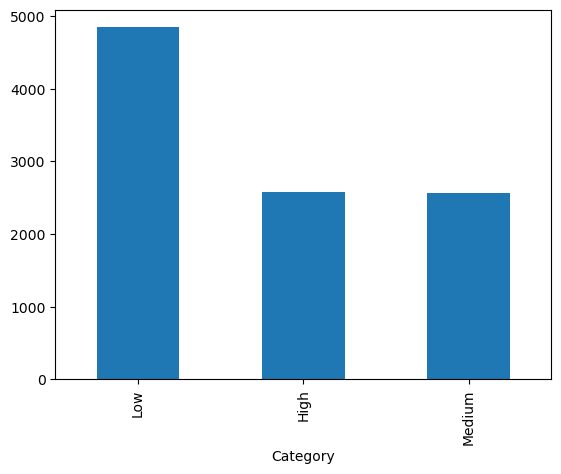

In [93]:
df.Category.value_counts().plot(kind="bar")

It bears pointing out that there can be different data types in a data frame which we can see via the **dtypes** attribute.

In [94]:
df.dtypes

Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

In [95]:
# We can select or exclude specific types
df.select_dtypes("float")

,Sales,Discount,Profit
0,261.9600,0.00,41.9136
1,731.9400,0.00,219.5820
2,14.6200,0.00,6.8714
3,957.5775,0.45,-383.0310
4,22.3680,0.20,2.5164
...,...,...,...
9989,25.2480,0.20,4.1028
9990,91.9600,0.00,15.6332
9991,258.5760,0.20,19.3932
9992,29.6000,0.00,13.3200


In [96]:
df.select_dtypes(exclude="float").iloc[0:5,0:5]

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335


## Plotting

This is probably one of the more tedious aspects of Python just as learning ggplot2 or lattice graphics might be in R. Graphics packages are developed using somewhat arbitrary concepts but once you have worked a few examples at least you have a shot at making things work. For this course, you will see many examples. 

Text(0.5, 1.0, 'Two Functions')

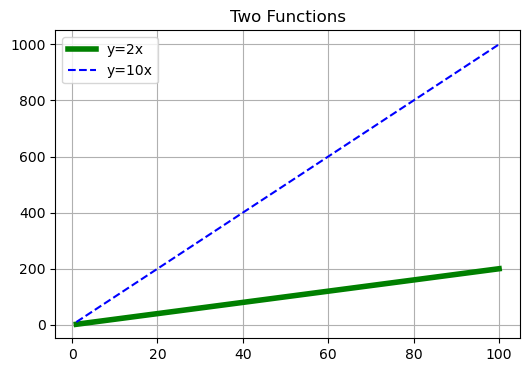

In [97]:
import matplotlib.pyplot as plt
x = np.linspace(1,100,200)
y1 = 2*x
y2 = 10*x
# 

plt.figure(figsize=(6,4))
plt.plot(x,y1,label="y=2x",lw=4,c="green")
plt.plot(x,y2,label="y=10x",ls="--",c="blue")
plt.legend()
plt.grid()
plt.title("Two Functions")

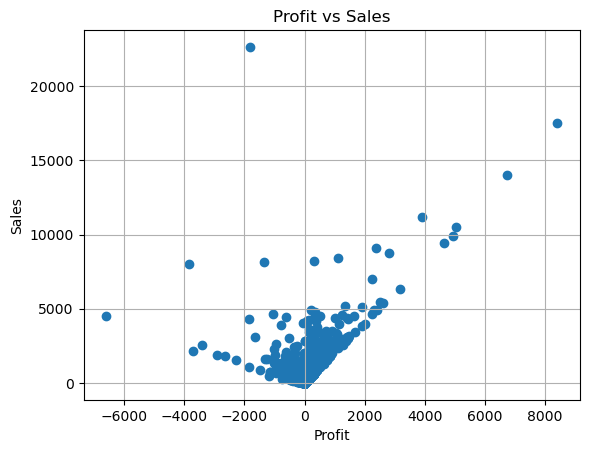

In [99]:
import matplotlib.pyplot as plt
# You can start plotting

plt.scatter('Profit','Sales',data=df)
plt.xlabel("Profit")
plt.ylabel("Sales")
plt.title("Profit vs Sales")
plt.grid()

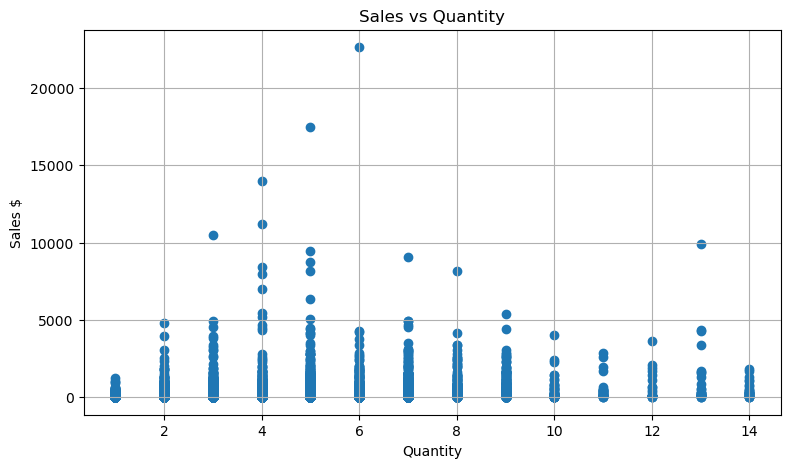

In [100]:
# But we can setup a plot with some defaults
plt.figure(figsize=(9,5))   # Setup a Plot with some defaults
plt.scatter("Quantity","Sales",data=df)
plt.xlabel("Quantity")
plt.ylabel("Sales $")
plt.title("Sales vs Quantity")
plt.grid()

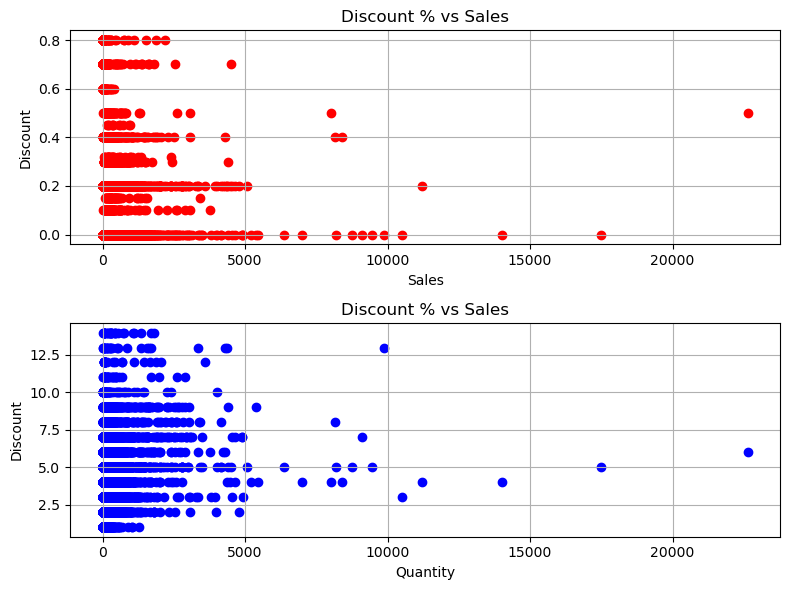

In [101]:
plt.figure(figsize=(8,6),tight_layout=True)   # Setup a Plot with some defaults
#plt.tight_layout(h_pad=2)

# A figure can contain subplots

plt.subplot(2,1,1) 
plt.scatter("Sales","Discount",data=df,c="red")
plt.xlabel("Sales")
plt.ylabel("Discount")
plt.title("Discount % vs Sales")
plt.grid()

# 

plt.subplot(2,1,2)
plt.scatter("Sales","Quantity",data=df,c="blue")
plt.xlabel("Quantity")
plt.ylabel("Discount")
plt.title("Discount % vs Sales")
plt.grid()


In [102]:
# Let's plot the Ga Sales per Order vs Alabama Sales per Order
ga_sales = df[df.State == "Georgia"]
ala_sales = df[df.State == "Alabama"]

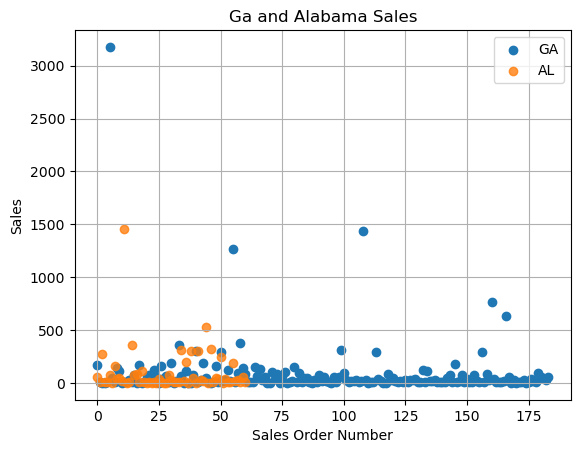

In [103]:
plt.scatter(range(0,len(ga_sales)),ga_sales.Profit,label="GA")
plt.scatter(range(0,len(ala_sales)),ala_sales.Profit,label="AL",alpha=0.8)
plt.legend()
plt.xlabel("Sales Order Number")
plt.ylabel("Sales")
plt.title("Ga and Alabama Sales")
plt.grid()

<Axes: title={'center': 'Sales'}, xlabel='State'>

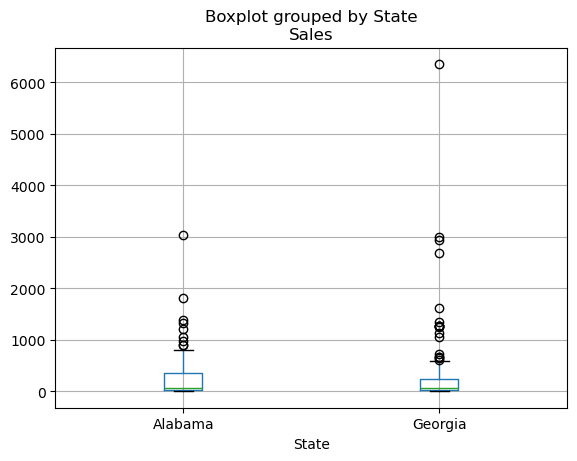

In [104]:
ga_ala = pd.concat([ga_sales,ala_sales])
ga_ala.boxplot(column='Sales',by='State')

array([<AxesSubplot:title={'center':'Alabama'}>,
       <AxesSubplot:title={'center':'Georgia'}>], dtype=object)

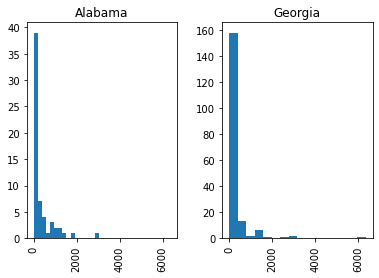

In [619]:
ga_ala = pd.concat([ga_sales,ala_sales])
ga_ala.hist(column='Sales',by='State',sharex=True,bins=16)

Here is a more practical example that builds a regression model to predict the MPG of a car related data set. We use something called Cross Fold Validation where we look at, in this case, four different versions of the data. We build on each of these versions and then plot the predicted MPG vs the actual MPG.

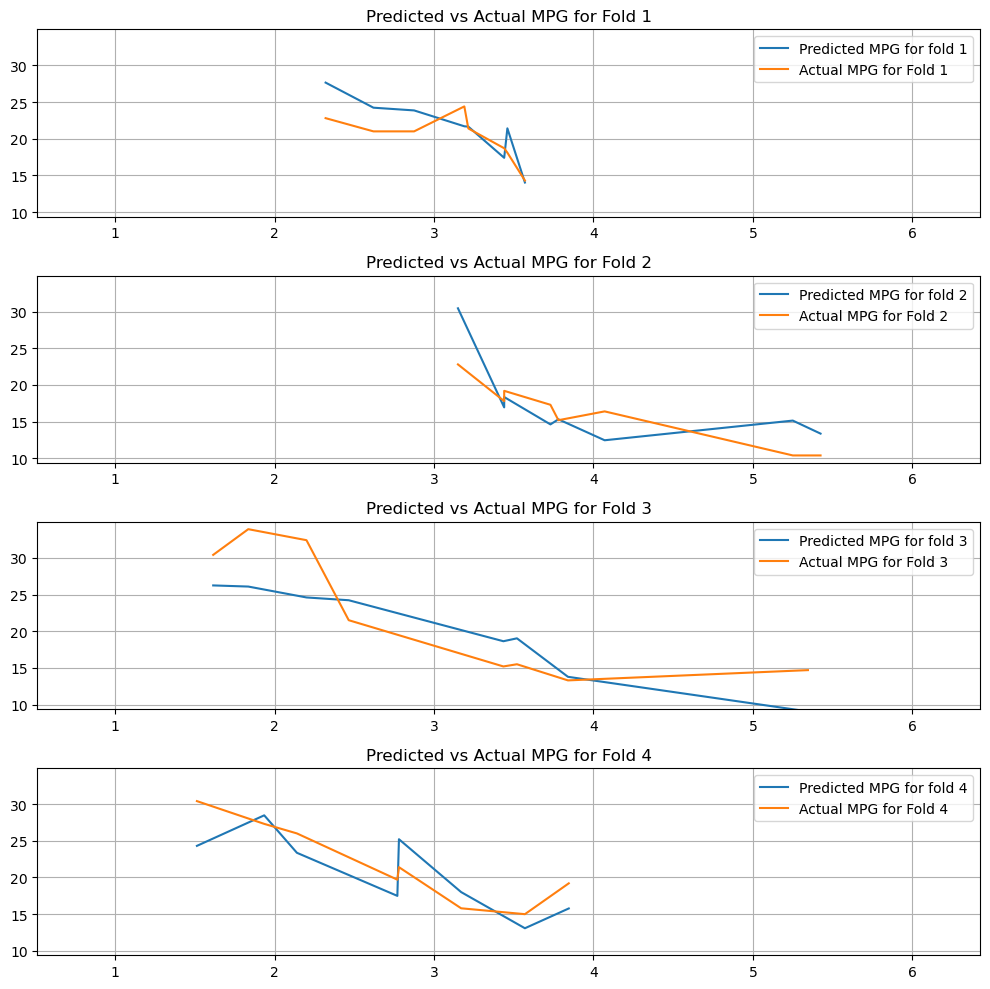

In [105]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

ii = 1
url = "https://raw.githubusercontent.com/steviep42/bios534_spring_2020/master/data/mtcars.csv"
mtcars = pd.read_csv(url)

mtvals = mtcars.values            # creates a numpy array
y = mtvals[:,0]         # Gets the mpg column
X = mtvals[:,1:10]      # Gets everything BUT the mpg column

wtcol = 4
nfold = 4
kfold = KFold(nfold)

# Main processing loop for the folds

plt.figure(figsize=(10,10),tight_layout=True)

for train_index, test_index in kfold.split(X, y):
  # split data coming from each of the 4 folds
        X_train, X_test = X[train_index], X[test_index]
        Y_train, Y_test = y[train_index], y[test_index]
        
        # Initialize a model
        regress = LinearRegression()
        
        # Fit the Model
        regress.fit(X_train,Y_train)
        
        # Now let's do a prediction on the test data
        predict_test = regress.predict(X_test)
    
        # This zip is necessary sometimes to sort the X values with their
        # correspinding y values 
        xs, ys = zip(*sorted(zip(X_test[:,wtcol], predict_test)))
    
        plotfac = 1    # A spacing factor
        
        # Create some subplots
        plt.subplot(nfold,1,ii)
        
        # Create some annotation info and axis limits
        label = f'Predicted MPG for fold %s' % ii
        plt.plot(xs,ys,label=label)
        plt.xlim([X[:,4].min()-plotfac,X[:,wtcol].max()+plotfac])
        plt.ylim([y.min()-plotfac,y.max()+plotfac])
        
        # correlate the Xs to the Ys like before 
        xs, ys = zip(*sorted(zip(X_test[:,wtcol], Y_test)))
        label = f'Actual MPG for Fold %s' % ii
        plt.plot(xs,ys,label=label)
        plt.grid()
        plt.legend()
        plt.title(f'Predicted vs Actual MPG for Fold %s' % ii)
        ii = ii+1

plt.show()

In [106]:
url = "https://raw.githubusercontent.com/steviep42/bios_534_2021/master/data/indometh.csv"
indo = pd.read_csv(url)
print(indo.head(10),"\n")
print(indo.describe())


   Subject  time  conc
0        1  0.25  1.50
1        1  0.50  0.94
2        1  0.75  0.78
3        1  1.00  0.48
4        1  1.25  0.37
5        1  2.00  0.19
6        1  3.00  0.12
7        1  4.00  0.11
8        1  5.00  0.08
9        1  6.00  0.07 

         Subject       time       conc
count  66.000000  66.000000  66.000000
mean    3.500000   2.886364   0.591818
std     1.720912   2.464432   0.632584
min     1.000000   0.250000   0.050000
25%     2.000000   0.750000   0.110000
50%     3.500000   2.000000   0.340000
75%     5.000000   5.000000   0.832500
max     6.000000   8.000000   2.720000


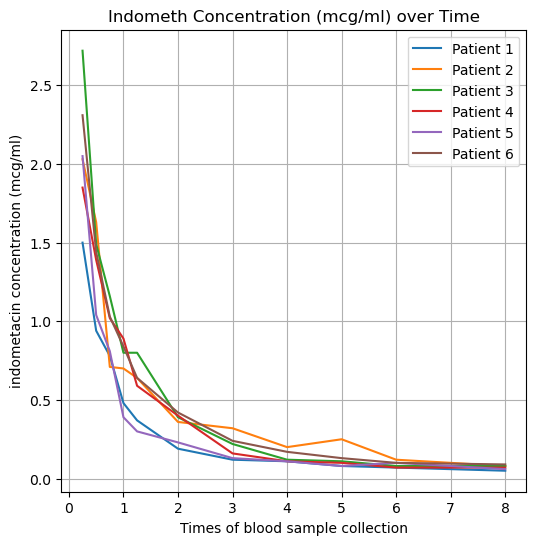

In [107]:
plt.figure(figsize=(6,6))
indo.Subject.unique()

for ii in indo.Subject.unique():
    temp = indo.loc[indo.Subject == ii]
    plt.plot('time','conc',data=temp,label=f'Patient %s' % ii)

plt.legend()
plt.ylabel("indometacin concentration (mcg/ml)")
plt.xlabel("Times of blood sample collection")
plt.title("Indometh Concentration (mcg/ml) over Time")
plt.grid()

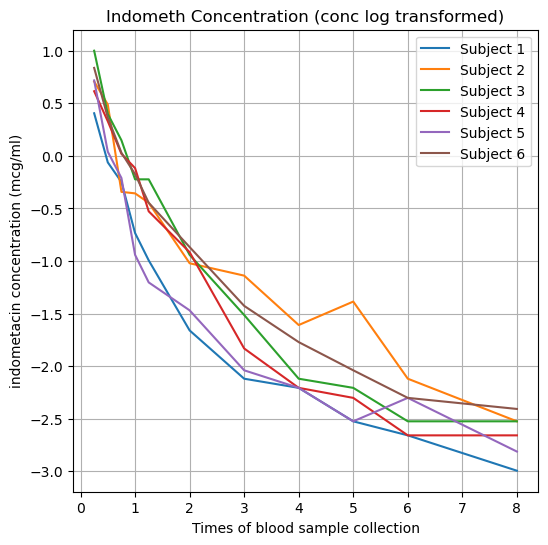

In [108]:
def indometh(log=False):
    import numpy as np
    plt.figure(figsize=(6,6))

    for ii in indo.Subject.unique():
        temp = indo.loc[indo.Subject == ii]
        if log:
            plt.plot(temp.time,np.log(temp.conc),label=f'Subject %s' % ii)
            title = f'Indometh Concentration (conc log transformed)'
        else:
            plt.plot(temp.time,temp.conc,label=f'Subject %s' % ii)
            title = f'Indometh Concentration %s' % i
    plt.legend()
    plt.title(title)
    plt.grid()
    plt.xlabel("Times of blood sample collection")
    plt.ylabel("indometacin concentration (mcg/ml)")

indometh(log=True)

Text(0.5, 0, 'Patient Number')

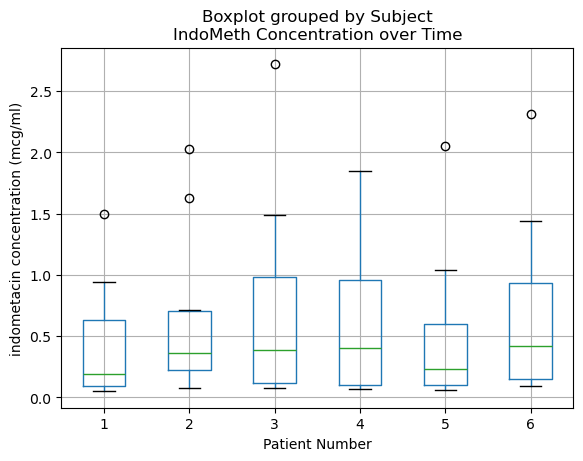

In [109]:
indo.boxplot('conc',by="Subject")
plt.title("IndoMeth Concentration over Time")
plt.ylabel("indometacin concentration (mcg/ml)")
plt.xlabel("Patient Number")

So let's build a Logistic Regression object to predict whether a car has an automatic (0) or a manual transmission (1). We'll then plot the MPG vs wt and then color the points by whether the model indicates it is automatic or manual. 

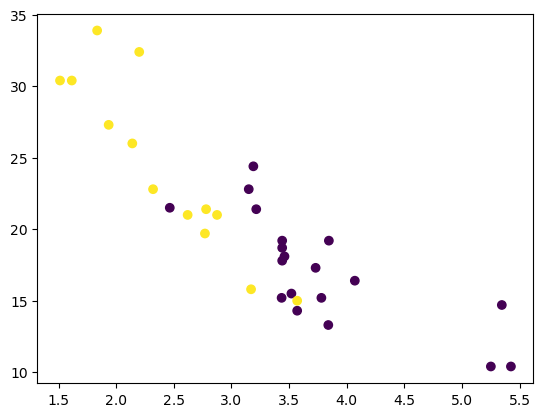

In [110]:
from sklearn.linear_model import LogisticRegression
url = "https://raw.githubusercontent.com/steviep42/bios534_spring_2020/master/data/mtcars.csv"
mtcars = pd.read_csv(url)

y = mtcars.am
X = mtcars.drop('am',axis=1)

logreg = LogisticRegression()
logreg.fit(X,y)

# these preds will be either 0 or 1
am_preds = logreg.predict(X)
plt.scatter(X.wt,X.mpg,c=am_preds)

## Arrays vs Data Frames

It's easy to get confused about how dataframes relate to arrays and vice-versa. Data frames are great for humans because we can see the names of the columns and accomplish summary using groupby and other helpful functions designed for reporting. Dataframes also provides us with the capability to host heterogenous data.

Arrays, however, are optimized for computation and linear algebra type operations. They also require that all elements are of the same type. Because of this, many of the computational methods will work faster since it is assumed that the data is numeric in nature. 

The premier package in Python for managing arrays is **numpy**

In [111]:
import numpy as np
a = np.array([0, 1, 2, 3])
print(a)
print(type(a))
print(a.dtype)

print("Array dimensions:",a.ndim)
print("Array shape:",a.shape)

[0 1 2 3]
<class 'numpy.ndarray'>
int64
Array dimensions: 1
Array shape: (4,)


Indexing is similar to lists at least when dealing with a one-d array

In [112]:
print(a[0:3])
print(a[-1])

[0 1 2]
3


In [113]:
# multidimensional array
a = np.array([[ 0, 1, 2, 3],[10,11,12,13]])
print(a,"\n")

print("shape is",a.shape,"\n")

print("number of dimensions:",a.ndim)

[[ 0  1  2  3]
 [10 11 12 13]] 

shape is (2, 4) 

number of dimensions: 2


In [114]:
# 0 row, all columns
print(a[0,:],"\n")

# all rows, all columns
print(a[:])
print(a,"\n")

# all rows, 0 column
print(a[:,0],"\n")

# all rows, first 2 columns
print(a[:,0:2])

[0 1 2 3] 

[[ 0  1  2  3]
 [10 11 12 13]]
[[ 0  1  2  3]
 [10 11 12 13]] 

[ 0 10] 

[[ 0  1]
 [10 11]]


Creating arrays is easy

In [115]:
a = np.arange(25)
print(a)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]


In [116]:
a = a.reshape(5,5)
print(a,"\n")
#
# transpose
print(a.T)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]] 

[[ 0  5 10 15 20]
 [ 1  6 11 16 21]
 [ 2  7 12 17 22]
 [ 3  8 13 18 23]
 [ 4  9 14 19 24]]


In [117]:
print(np.ones((2,2), dtype='float64'),"\n")
print(np.zeros((2,2), dtype='float64'),"\n")
print(np.identity(4, dtype=int))

[[1. 1.]
 [1. 1.]] 

[[0. 0.]
 [0. 0.]] 

[[1 0 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 0 0 1]]


In [118]:
# mean of all columns
print(np.mean(a,axis=0))

# mean of all rows
print(np.mean(a,axis=1))

[10. 11. 12. 13. 14.]
[ 2.  7. 12. 17. 22.]


In [119]:
# the following would work if "a" were to be a data frame
a.boxplot()

AttributeError: 'numpy.ndarray' object has no attribute 'boxplot'

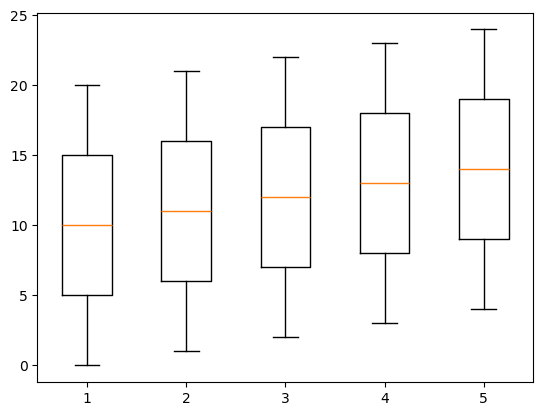

In [120]:
# But you can plot it using typical plot functions
plt.boxplot(a)
plt.show()

<AxesSubplot:>

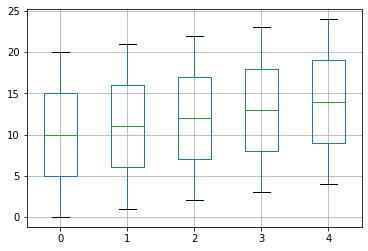

In [297]:
# dataframes can be turned into arrays and vice versa
pd.DataFrame(a).boxplot()

In [124]:
from sklearn.linear_model import LinearRegression
import numpy as np 

url = "https://raw.githubusercontent.com/steviep42/bios534_spring_2020/master/data/mtcars.csv"
mtcars = pd.read_csv(url)

y = mtcars.mpg
X = mtcars.drop('mpg',axis=1)

print("y is of type:",type(y),"\n")
print("X is of type:",type(X),"\n")

lr = LinearRegression()
lr.fit(X,y)
print("Explained variance (R^2) for training data is:",np.round(lr.score(X,y),2))

y is of type: <class 'pandas.core.series.Series'> 

X is of type: <class 'pandas.core.frame.DataFrame'> 

Explained variance (R^2) for training data is: 0.87


In [125]:
# We can convert to an array
X = mtcars.drop('mpg',axis=1).values
print("Type of X is:",type(X))

# 
y = mtcars.mpg
print("Type of y is:",type(y))


Type of X is: <class 'numpy.ndarray'>
Type of y is: <class 'pandas.core.series.Series'>


In [126]:
lr.fit(X,y)

LinearRegression()

In [127]:
mtcars.columns

Index(['mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear',
       'carb'],
      dtype='object')

# Stats

Up to this point, we have focused on core Python concepts—variables, arrays, functions, and data structures. In this section, we begin using those same tools to interact with basic statistical ideas computationally. Python’s statistics libraries allow us to represent familiar probability models, evaluate them at specific values, and generate simulated data under controlled assumptions. 

The goal here is not to develop new statistical theory, but to show how a modest amount of Python enables us to explore common statistical questions, visualize behavior, and run simple simulations that would be tedious or impractical by hand. These tools provide a practical bridge between mathematical definitions and real-world data analysis, preparing us for more advanced modeling later on.


In [154]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


## Distributions 

In statistics, probability distributions such as the normal, uniform, or chi-square are *idealized objects. They describe how values would be distributed under specific assumptions. Conceptually, a distribution is not a dataset but a model—a complete description of variability that exists independently of any particular sample. 

Python reflects this idea directly: distributions are represented as objects with well-defined properties and behaviors, such as computing densities, probabilities, or generating simulated observations. This stands in contrast to the “messy” datasets we will ultimately encounter, which are finite, noisy, and shaped by measurement error, missing values, and uncontrolled processes. 

Working with distributions as objects allows us to reason clearly about assumptions and expected behavior before confronting real data, helping us separate questions about models from questions about observations.

One reason probability distributions are so useful is that they provide compact mathematical descriptions of how data can be generated. When data arise from a process that follows a known distribution, a relatively simple function can describe a wide range of possible outcomes. 

If we can show that observed data are consistent with such a model, many tasks become easier, including summarization, simulation, and reasoning about variability. In practice, this does not mean data are ever perfectly generated by a mathematical formula, but rather that distributions give us useful approximations that help structure our thinking about uncertainty and expected behavior.

| Distribution | Example variable | Why this model is useful |
|-------------|------------------|--------------------------|
| Normal (Gaussian) | Adult height within a population | Many small independent effects combine to produce symmetric variability |
| Normal (Gaussian) | Measurement error from instruments | Noise accumulates around a true value |
| Uniform | Random number between 0 and 1 | All values in the range are equally likely by design |
| Uniform | Random assignment to experimental groups | No outcome is preferred over another |
| Binomial | Number of heads in repeated coin flips | Fixed number of trials with yes or no outcomes |
| Binomial | Number of defective items in a batch | Each item has the same probability of failure |
| Poisson | Number of emails received per hour | Counts of independent events in a fixed interval |
| Poisson | Number of arrivals at a service desk | Events occur at a roughly constant rate |
| Exponential | Time until a machine fails | Models waiting time until the next event |
| Chi-square | Variability or goodness-of-fit statistics | Arises from sums of squared deviations |



In [177]:
normal_dist = stats.norm(loc=0, scale=1)
normal_dist


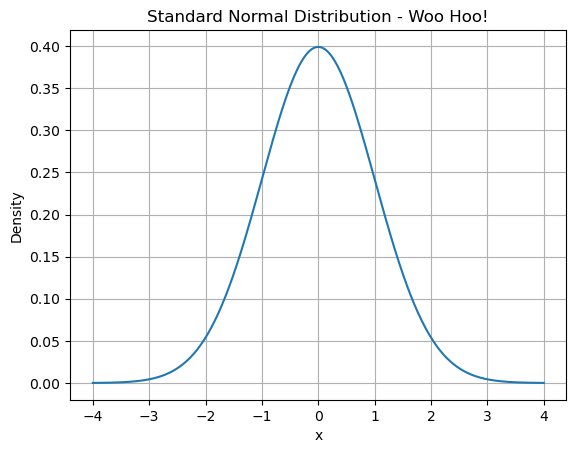

In [178]:
x = np.linspace(-4, 4, 500)
y = normal_dist.pdf(x)

plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("Density")
plt.title("Standard Normal Distribution - Woo Hoo!")
plt.grid()
plt.show()


So what can we do with some traditionally asked questions such as "given a number in this domain (X-axis values) with this the probability of seeing a value which is less than or equal to "X". In the following case we can use some built in functions for that. 

In [179]:
# probability of seeing a value less than or equal to -3
print(round(normal_dist.cdf(-3),3))

# probability of seeing a value less than or equal to -2
print(round(normal_dist.cdf(-2),3))

# probability of seeing a value less than or equal to 2
print(round(normal_dist.cdf(2),3))

# probability of seeing a value less than or equal to 4
print(round(normal_dist.cdf(4),3))



0.001
0.023
0.977
1.0


So we can keep asking this question all day long and while that might be somewhat interesting it's not necessarily a question you would get as a Data Scientist - you might and it's something you should be able to answer. As Data Scientists you will generally want an easy way to view data as a whole or in aggregate as opposed to responding to highly specific point estimates. 

In this case let's plot the probabilities emerging from the above question using a domain from -4 to 4. This will show us how the resutling probabilties "accumulate". And we can plot those probabilities.

What we will see is the "Cumulative Distribution Function" - the CDF answers every probability question of the form ‘less than or equal to x’. Plotting it shows us how those answers change continuously.

So now we can just ask our question "What is the probability of seeing a number from a Normal Distribution that is less than X". So we just look along the X axis for the value of interest and note the corresponding Y value. Better yet we can show this to someone so they will leave you alone ! 

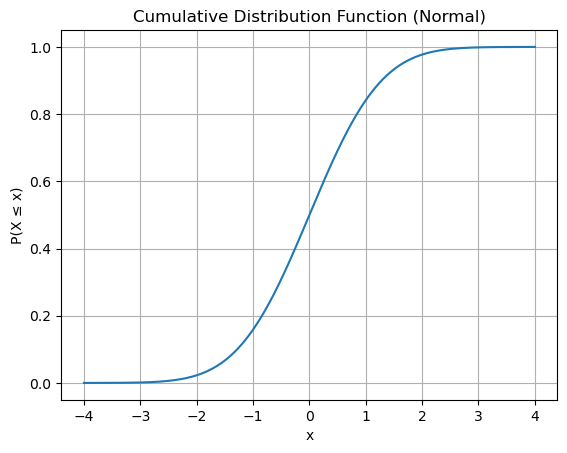

In [180]:
x = np.linspace(-4, 4, 500)
cdf_values = normal_dist.cdf(x)

plt.plot(x, cdf_values)
plt.xlabel("x")
plt.ylabel("P(X ≤ x)")
plt.title("Cumulative Distribution Function (Normal)")
plt.grid()
plt.show()


At far left, the probability is close to 0

At far right, the probability is close to 1

The curve never decreases

The steepest region corresponds to where the PDF is largest

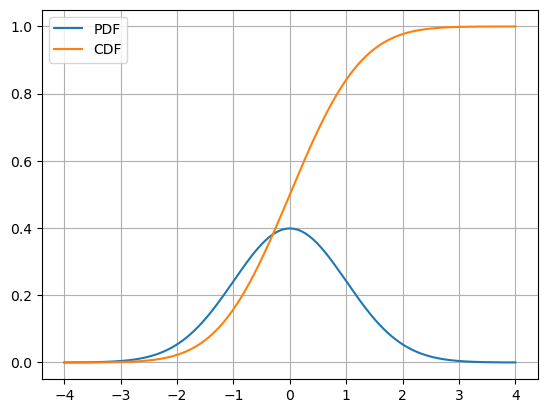

In [173]:
plt.plot(x, normal_dist.pdf(x), label="PDF")
plt.plot(x, normal_dist.cdf(x), label="CDF")
plt.legend()
plt.grid()
plt.show()


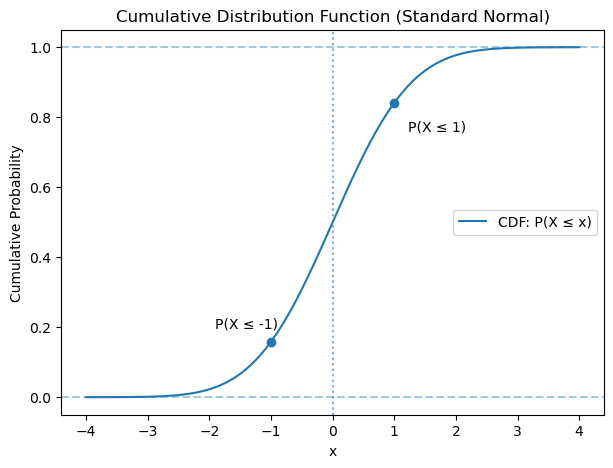

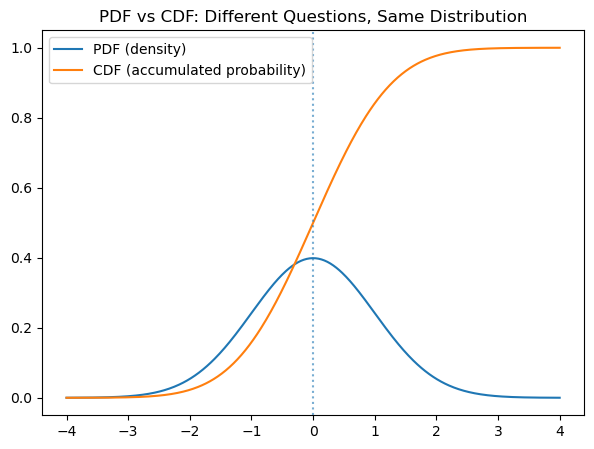

In [181]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Define distribution and range
normal_dist = stats.norm(loc=0, scale=1)
x = np.linspace(-4, 4, 500)
cdf = normal_dist.cdf(x)

# Plot CDF
plt.figure(figsize=(7, 5))
plt.plot(x, cdf, label="CDF: P(X ≤ x)")

# Conceptual markers
plt.axhline(0, linestyle="--", alpha=0.4)
plt.axhline(1, linestyle="--", alpha=0.4)
plt.axvline(0, linestyle=":", alpha=0.6)

# Mark specific probabilities
x1, x2 = -1, 1
plt.scatter([x1, x2], [normal_dist.cdf(x1), normal_dist.cdf(x2)])
plt.annotate("P(X ≤ -1)", (x1, normal_dist.cdf(x1)),
             textcoords="offset points", xytext=(-40,10))
plt.annotate("P(X ≤ 1)", (x2, normal_dist.cdf(x2)),
             textcoords="offset points", xytext=(10,-20))

plt.xlabel("x")
plt.ylabel("Cumulative Probability")
plt.title("Cumulative Distribution Function (Standard Normal)")
plt.legend()
plt.show()


plt.figure(figsize=(7, 5))
plt.plot(x, normal_dist.pdf(x), label="PDF (density)")
plt.plot(x, normal_dist.cdf(x), label="CDF (accumulated probability)")
plt.axvline(0, linestyle=":", alpha=0.6)
plt.legend()
plt.title("PDF vs CDF: Different Questions, Same Distribution")
plt.show()


## Sampling

In data analysis, we rarely focus on individual measurements in isolation. Instead, we observe at large scale with an eye towrds summarizing their behavior using quantities such as means, proportions, or other aggregates. You learn about various statistical tests to look at differences between these quantities across groups or cohorts.

Even when a dataset contains many observations, it still represents just one realization of an underlying process. A natural question, then, is how stable those summaries would be if we were to observe a different dataset generated under the same conditions. 

for example, by examining how sample means vary across repeated simulated datasets, we gain insight into the inherent variability of summary statistics themselves, rather than the variability of individual data points. This perspective is central to understanding uncertainty in data-driven conclusions.

So If we repeatedly take small samples from the same distribution, how much does the sample mean vary from sample to sample? 

The following line of code creates a synthetic dataset by repeatedly sampling from a model we already understand. It’s like running the same random experiment 10,000 times and recording the results.

In [188]:
# Generate 10,000 individual samples from a normal didstirbution
samples = normal_dist.rvs(size=10_000)

# What do we have here? 
print(type(samples), samples.shape)

# Check out what you get

samples[0:10]


<class 'numpy.ndarray'> (10000,)


array([-1.03676697, -0.59320772, -0.29121454,  0.39084025,  1.18132598,
       -0.06581425, -0.92048409,  0.63650126,  0.64224603, -0.01886371])

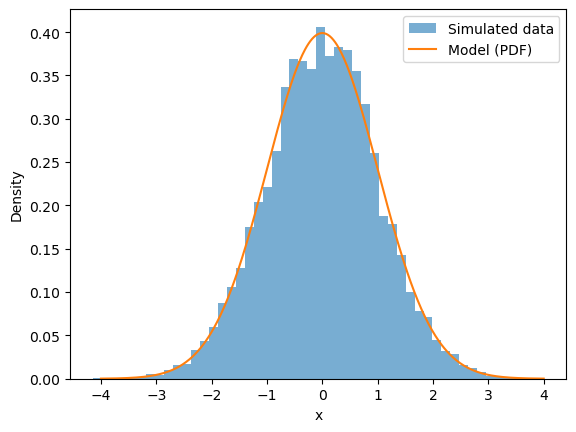

In [189]:
plt.hist(samples, bins=50, density=True, alpha=0.6, label="Simulated data")
plt.plot(x, normal_dist.pdf(x), label="Model (PDF)")
plt.xlabel("x")
plt.ylabel("Density")
plt.legend()
plt.show()


Well we kind of already know that our data is gonna be normally distributed - DUH ! - because we generated it from a Normal distribution. So the more samples we generate and plot the closer the resulting plot will be to an idealized Normal distribution. The larger point here is that some individual values will be more than say a cople of standard deviations away from the mean. 

This also means that doing an individual sample of some data is somewhat worthless when trying to understand the variable under consideration (say height or weight). We have to keep getting data to pad out our idea of what kind of function is generating our data.

So here we can ask the question about how often would we see values < -2 or > 2? Obviously we could count the number of data points that satisfy that condition but often times we are just looking for a general idea and can look at a graph which is more intutive especially if you need to show somene who isn't wired for text-based data arguements. 

In [190]:
extreme_fraction = np.mean(np.abs(samples) > 2)
extreme_fraction


0.0478

Are yous surprised to find that not alot of these samples (the ones > 2) are likely to occur? You shouldn't be because we already concluded that a couple of cells ago. 

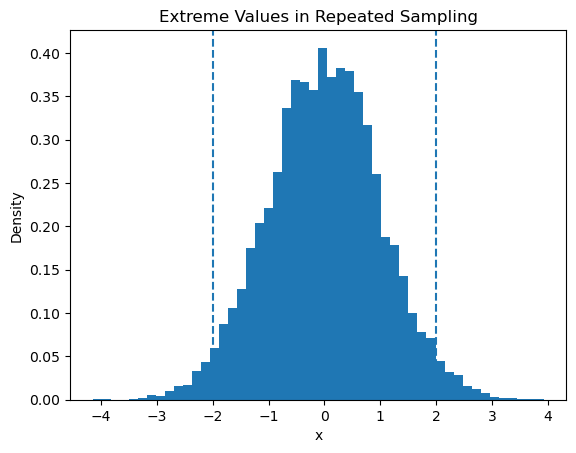

In [202]:
plt.hist(samples, bins=50, density=True)
plt.axvline(2, linestyle="--")
plt.axvline(-2, linestyle="--")
plt.xlabel("x")
plt.ylabel("Density")
plt.title("Extreme Values in Repeated Sampling")
plt.show()


## Does Having More Data Help?

In data-driven work, we often operate under the assumption that having more data leads to more reliable conclusions. This intuition shows up everywhere, rom collecting additional measurements to aggregating logs, transactions, or experimental results at scale. But this raises an important question: "what does “better” actually mean in this context? 

Rather than focusing on individual observations, we typically rely on summaries of variables to guide decisions and understanding. The motivation for the following simulation is to explore how the stability of such summaries depends on the amount of data available. By examining how the same summary behaves across datasets of different sizes generated under identical assumptions, we can make concrete the idea that scale affects reliability, not by eliminating randomness, but by constraining its impact.

Let's create a stucture, in this case a dictionary, that contains the results of a sampling operation that varies based on values contained in a pre-defined list. First we'll create a set of five samples sets (each of a 1,000) then another set of 20 samples sets (each of a 1,0000) and then a final set of 100 sample sets (also each of a 1,000). 

Then we'll plot them to see how closely each approximates the distibution from which it came. 

In [203]:
sample_sizes = [5, 20, 100]
means_by_size = {}

for n in sample_sizes:
    means = []
    for _ in range(1000):
        sample = normal_dist.rvs(size=n)
        means.append(sample.mean())
    means_by_size[n] = means


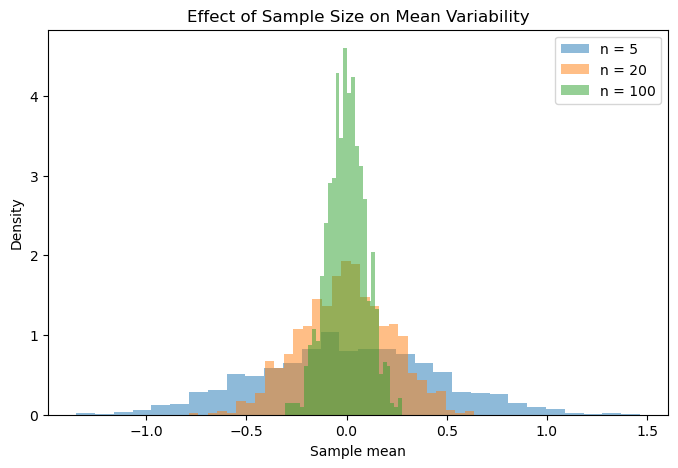

In [204]:
plt.figure(figsize=(8, 5))

for n, means in means_by_size.items():
    plt.hist(means, bins=30, density=True, alpha=0.5, label=f"n = {n}")

plt.xlabel("Sample mean")
plt.ylabel("Density")
plt.title("Effect of Sample Size on Mean Variability")
plt.legend()
plt.show()


The simulations in this section have focused on understanding how statistical models behave under controlled assumptions and how scale influences the stability of data summaries. In practice, however, we rarely work with data generated from known distributions or under idealized conditions. Real datasets are often messy, incomplete, and shaped by factors we do not fully control. In the next lecture, we will shift our attention from models to observations by introducing Python-based exploratory data analysis. EDA provides the tools and mindset needed to examine real data, uncover structure, assess assumptions, and decide what questions are reasonable to ask before formal modeling begins.


## Pandas as a Container for Information

Before we go I wanted to introduce the important of pandas as a structure for holding data both from simulations as well as a actual data sets that we might want to read in from the internet or some repository. this will help prep us for our next lecture which talks about EDA which is known as Exploratory Data Analysis. 

Consider the following code which is quite similar to that which we have from above. It is useful and it's something you might do if you were trying to collect and ultiamtely maintain or analyze data on sample sizes. 

In [205]:
means = []

for _ in range(1000):
    sample = normal_dist.rvs(size=20)
    means.append(sample.mean())


This works pretty well but it leaves is with some questions:

What was the sample size?

Which simulation run did this come from?

Could we compare multiple conditions?

Could we seasily ummarize or visualize by group?

If we are willing to go just a little bit further in our code we can can store each result as a row with context for later, and more convenient, use. Ler's expand on our repvious example with storing the means.

In [206]:
import pandas as pd
import numpy as np
from scipy import stats

# We setup a Normal Distriution object
normal_dist = stats.norm(0, 1)

# set up an empty list
results = []

# We have a number of sample sizes 
sample_sizes = [5, 20, 100]

# So now we loop through our list of sample sizes
for n in sample_sizes:
    for run in range(1000):
        sample = normal_dist.rvs(size=n)

        # Interesting - we can careate a list element that is a dictionary
        results.append({
            "sample_size": n,
            "run": run,
            "sample_mean": sample.mean()
        })

# At the end of our simulation we can create a data frame

df_sim = pd.DataFrame(results)
df_sim.head()


,sample_size,run,sample_mean
0,5,0,0.318530
1,5,1,0.313653
2,5,2,-0.045214
3,5,3,-0.595092
4,5,4,-0.061448


In [207]:
df_sim.groupby("sample_size")["sample_mean"].agg(["mean", "std"])


,mean,std
sample_size,,
5,-0.003395,0.453444
20,0.001701,0.222343
100,0.004655,0.103952


Visualization becomes very easy since we have to refer to just one structure.

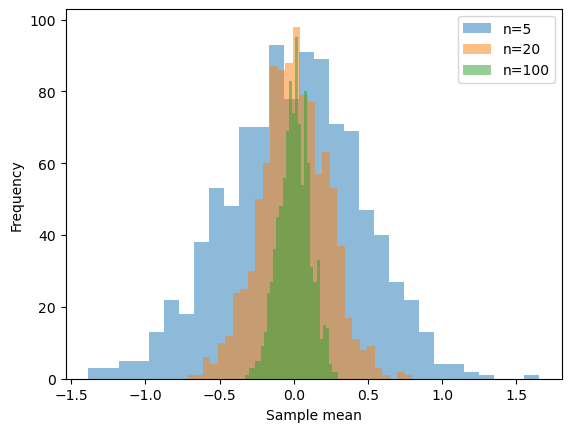

In [208]:
import matplotlib.pyplot as plt

for n in sample_sizes:
    subset = df_sim[df_sim["sample_size"] == n]
    plt.hist(subset["sample_mean"], bins=30, alpha=0.5, label=f"n={n}")

plt.legend()
plt.xlabel("Sample mean")
plt.ylabel("Frequency")
plt.show()


In [209]:
# With respect to the sample size set of 20 - what are the important quantiles?
df_sim.query("sample_size == 20").sample_mean.describe()


count    1000.000000
mean        0.001701
std         0.222343
min        -0.712437
25%        -0.137484
50%         0.000993
75%         0.148522
max         0.797548
Name: sample_mean, dtype: float64

In simulations, we often generate many related results under different conditions. A Pandas DataFrame provides a natural way to store those results alongside the information needed to interpret them, such as sample size or simulation run. Rather than managing multiple arrays or lists, we can treat each simulation outcome as a structured observation. This approach mirrors how we will work with real datasets in exploratory data analysis, where context is as important as the values themselves.

NumPy is great for generating and computing. Pandas is what we use when results need context and preservation with that context. It's like having a mini-database available. We can also 
create .CSV files for later use by ourselves or someone else. 

What you'll learn in the EDA lecture is that with simulations, we control the data-generating process. In exploratory data analysis, we don’t. Pandas gives us the tools to start asking sensible questions of real data.